In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn import ensemble
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

/root/anaconda3/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [3]:
# Load the dataset
data = pd.read_csv('Documents/Hands-On-Artificial-Intelligence-for-Cybersecurity-master/Chapter07/datasets/creditcard.csv')
df = data

In [4]:
X = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
		 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
		 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y = df['Class']

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=0)

In [6]:
rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain, ytrain)
ypredrf = rfmodel.predict(xtest)
rf_accuracy = metrics.accuracy_score(ytest, ypredrf)

In [7]:
params = {'n_estimators': 500, 'max_depth': 3, 'subsample': 0.5,
		   'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(xtrain, ytrain)
y_pred = clf.predict(xtest)
gb_accuracy = metrics.accuracy_score(ytest, y_pred)

In [11]:
xgb_model = XGBClassifier()
xgb_model.fit(xtrain, ytrain, eval_metric=['error'], eval_set=[(xtrain, ytrain), (xtest, ytest)])
y_pred_xgb = xgb_model.predict(xtest)
xgb_accuracy = metrics.accuracy_score(ytest, y_pred_xgb)

TypeError: fit() got an unexpected keyword argument 'eval_metric'

In [12]:
accuracy_values = [rf_accuracy, gb_accuracy, xgb_accuracy]
model_names = ["Random Forest", "Gradient Boosting", "XGBoost"]
 
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracy_values, palette="viridis")
plt.title("Model Comparison - Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.show()

NameError: name 'xgb_accuracy' is not defined

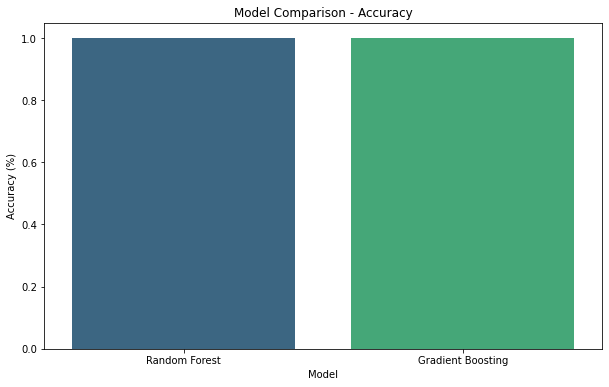

In [14]:
accuracy_values = [rf_accuracy, gb_accuracy]
model_names = ["Random Forest", "Gradient Boosting"]
 
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracy_values, palette="viridis")
plt.title("Model Comparison - Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.show()

In [13]:
print('Random Forest Classifier Accuracy: %f' % rf_accuracy)
print("Gradient Boosting Classifier Accuracy: %f" % gb_accuracy)
print("XGBoost Classifier Accuracy: %f" % xgb_accuracy)

Random Forest Classifier Accuracy: 0.999531
Gradient Boosting Classifier Accuracy: 0.999180


NameError: name 'xgb_accuracy' is not defined